In [1]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from lib import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

## Load

In [2]:
data = load('250321-exp7')  # best one yet
# data = load('250328-exp5')
# data = load('250328-sand1')

## Noise study and removal

In [8]:
# denoise_dataset(data, data.pop(-1))
noise = data.pop(-1)

## Do fits

../data/250321-exp7/250321-exp7_step0.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 3.28359971e-03]


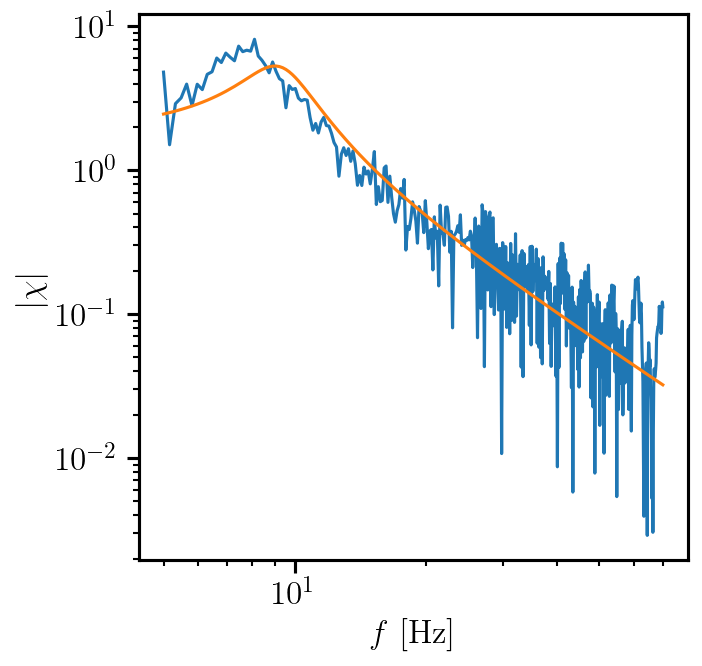

../data/250321-exp7/250321-exp7_step1.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 2.94788898e-03]


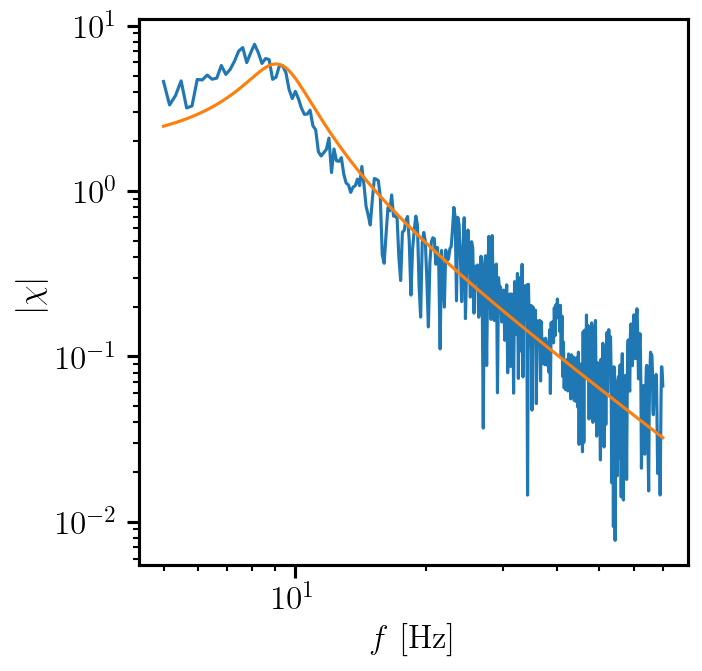

../data/250321-exp7/250321-exp7_step2.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 3.46433076e-03]


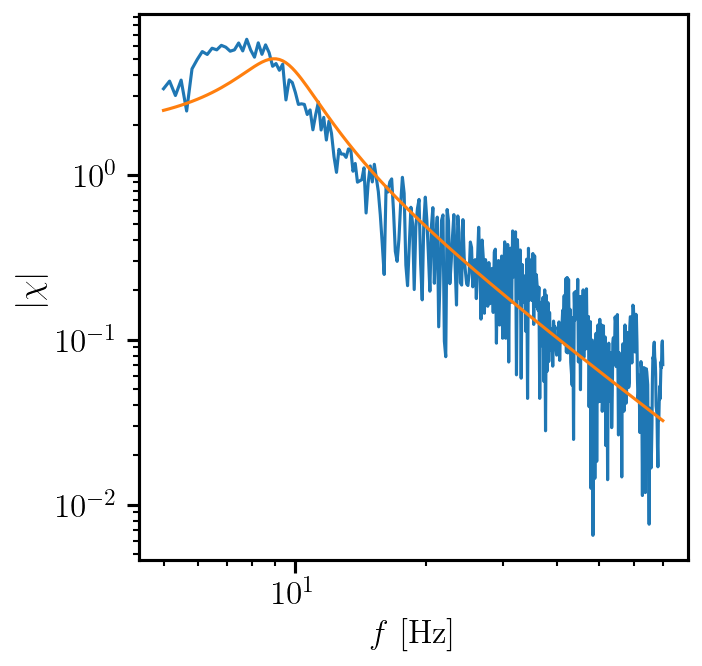

../data/250321-exp7/250321-exp7_step3.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 3.17652883e-03]


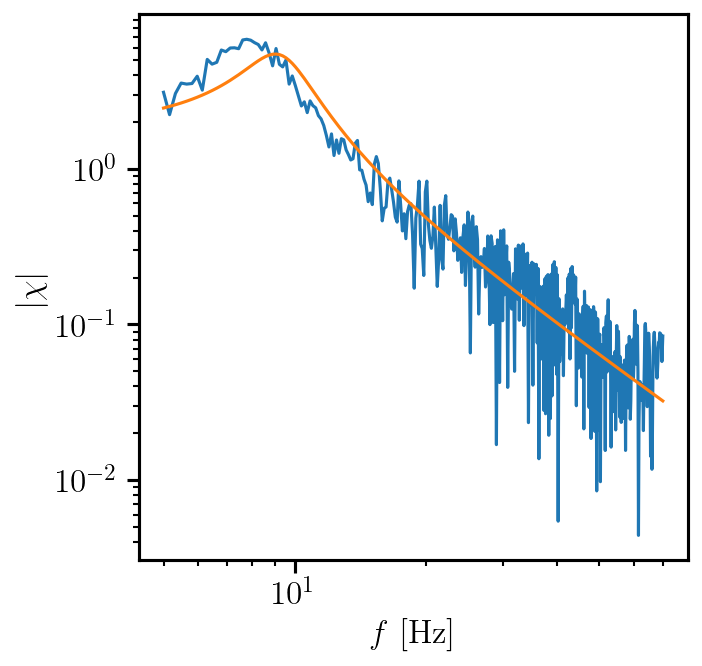

../data/250321-exp7/250321-exp7_step4.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 3.21130853e-03]


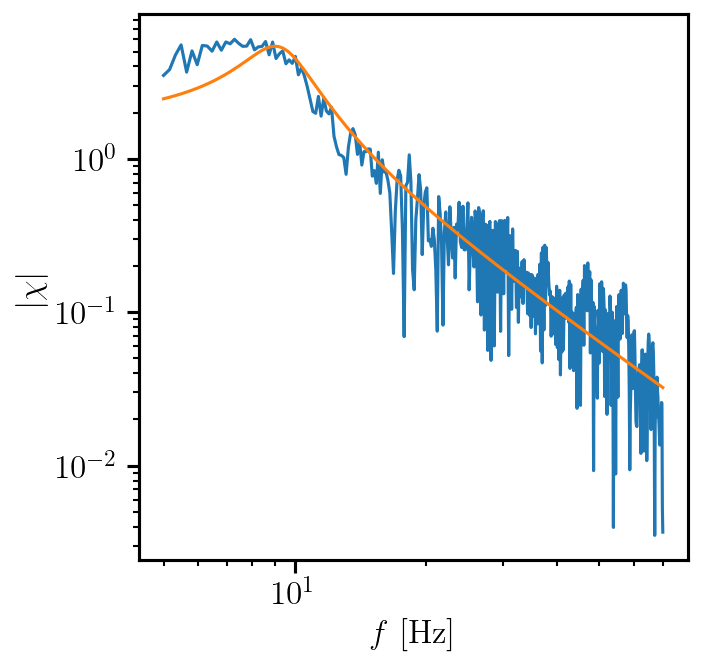

../data/250321-exp7/250321-exp7_step5.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 3.12142943e-03]


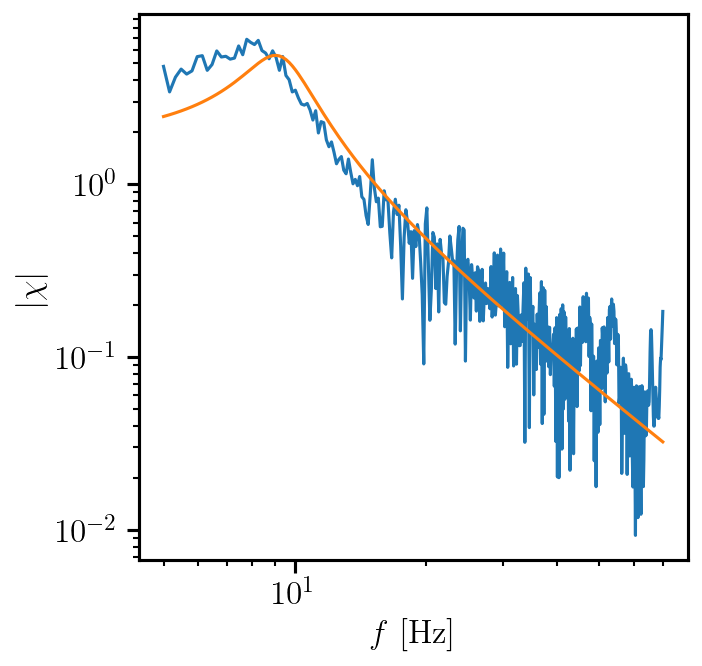

../data/250321-exp7/250321-exp7_step6.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 3.61733779e-03]


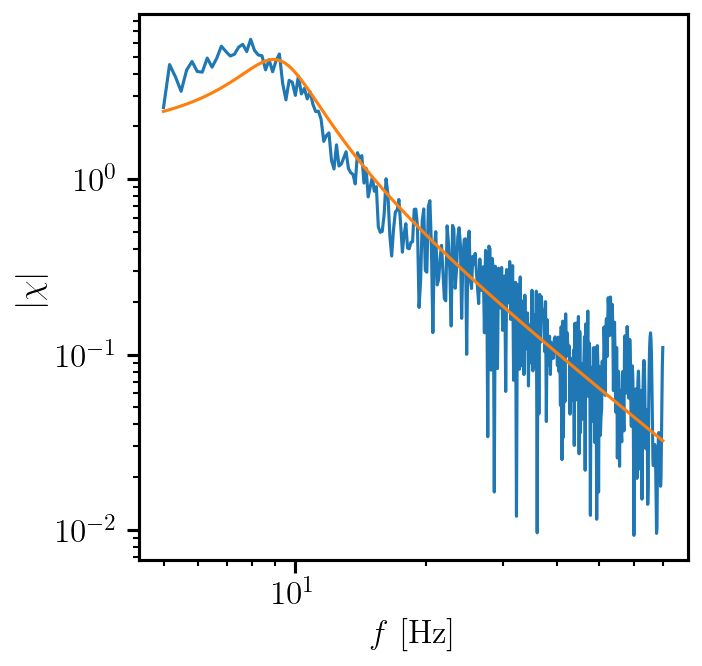

../data/250321-exp7/250321-exp7_step7.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 2.99971629e-03]


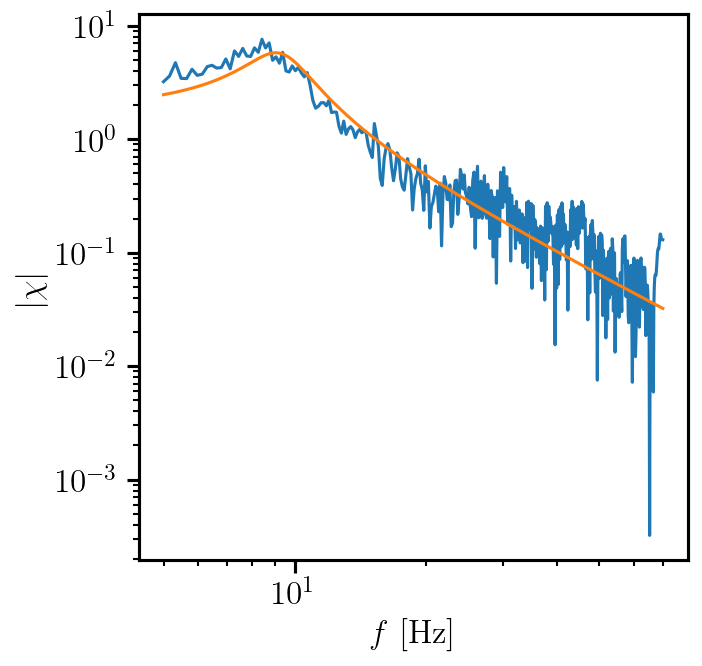

../data/250321-exp7/250321-exp7_step8.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 4.62944476e-03]


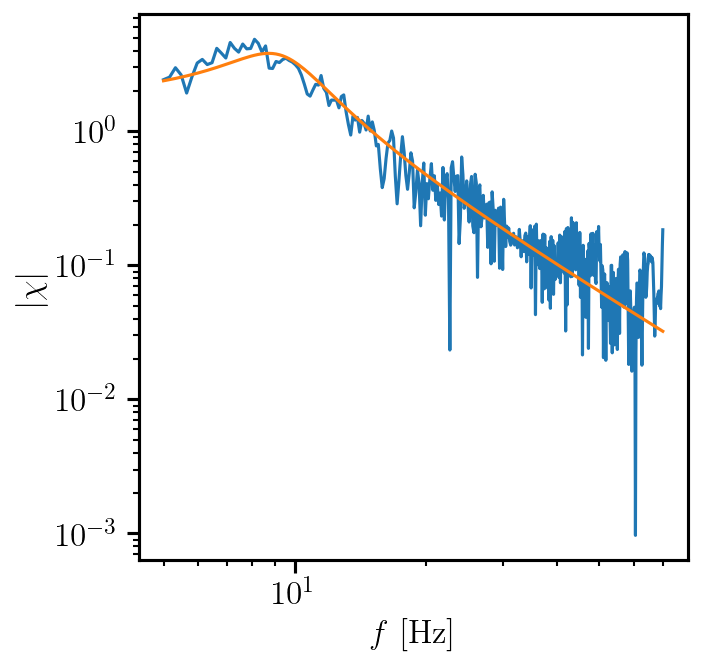

../data/250321-exp7/250321-exp7_step9.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 3.40883979e-03]


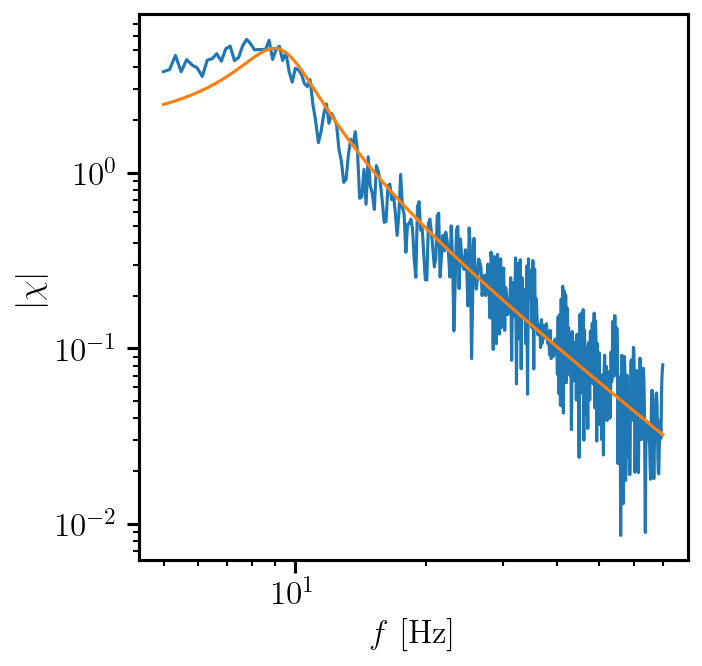

../data/250321-exp7/250321-exp7_step10.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 3.29017699e-03]


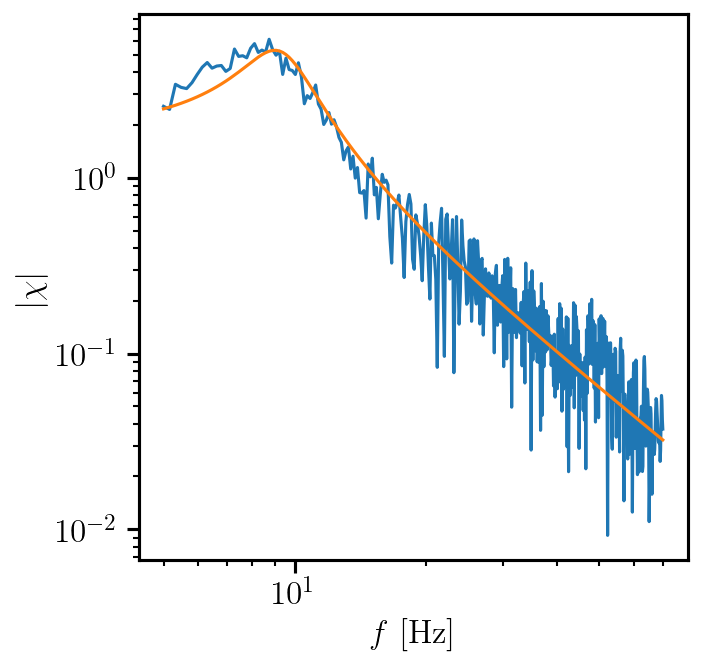

../data/250321-exp7/250321-exp7_step12.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 3.61680767e-03]


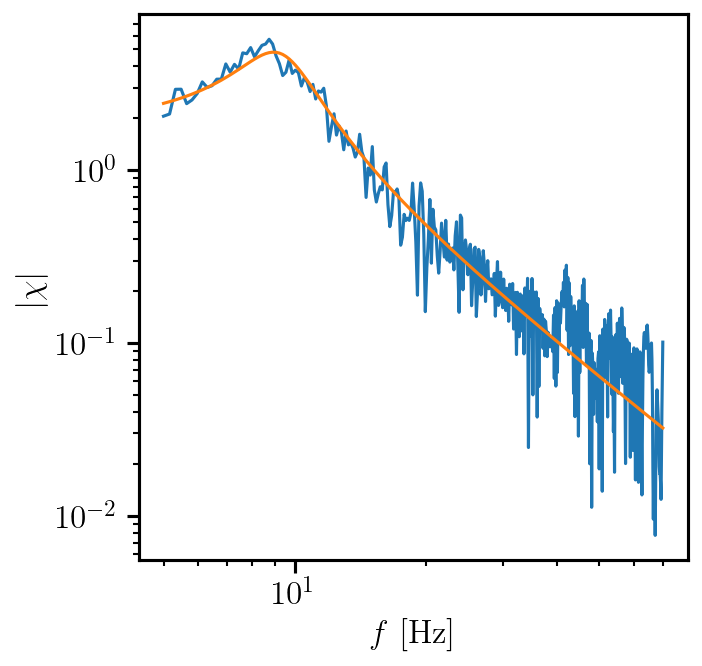

../data/250321-exp7/250321-exp7_step13.txt
[I, omega, alpha] =  [1.62855561e-04 5.83590414e+01 3.67772341e-03]


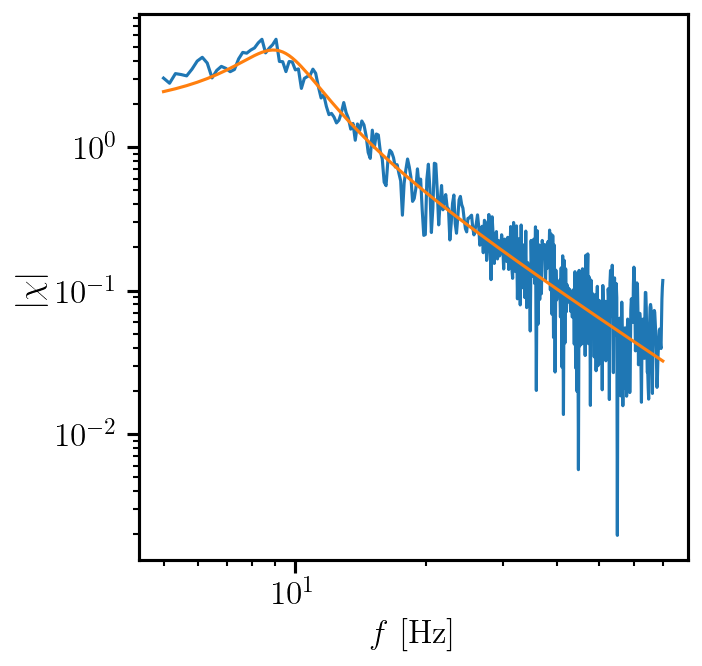

../data/250321-exp7/250321-exp7_step14.txt
[I, omega, alpha] =  [1.62855561e-04 5.85044748e+01 4.53213327e-03]


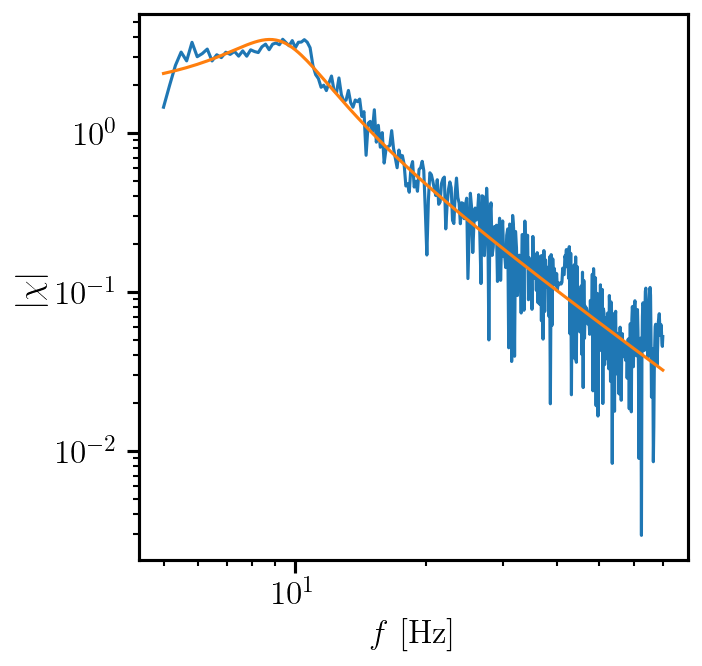

../data/250321-exp7/250321-exp7_step15.txt
[I, omega, alpha] =  [1.64235781e-04 5.85044748e+01 5.81047331e-03]


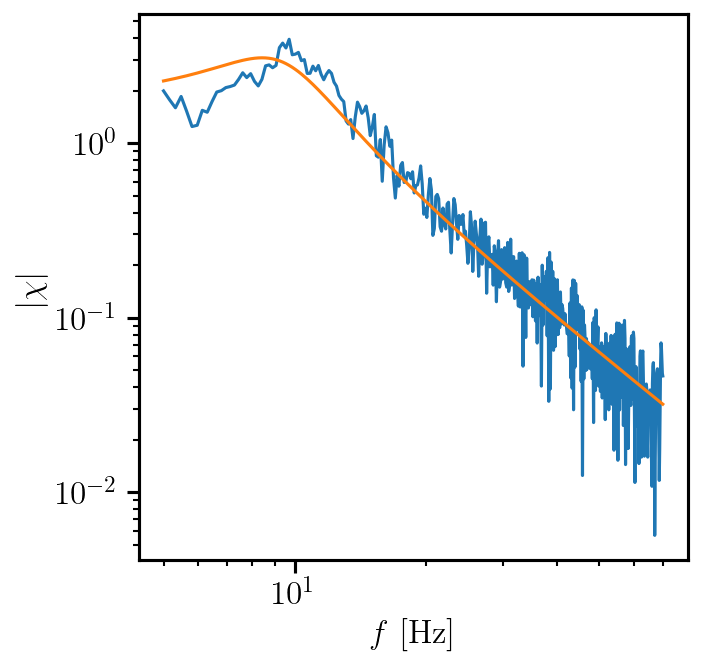

../data/250321-exp7/250321-exp7_step16.txt
[I, omega, alpha] =  [1.64235781e-04 5.85044748e+01 5.95478306e-03]


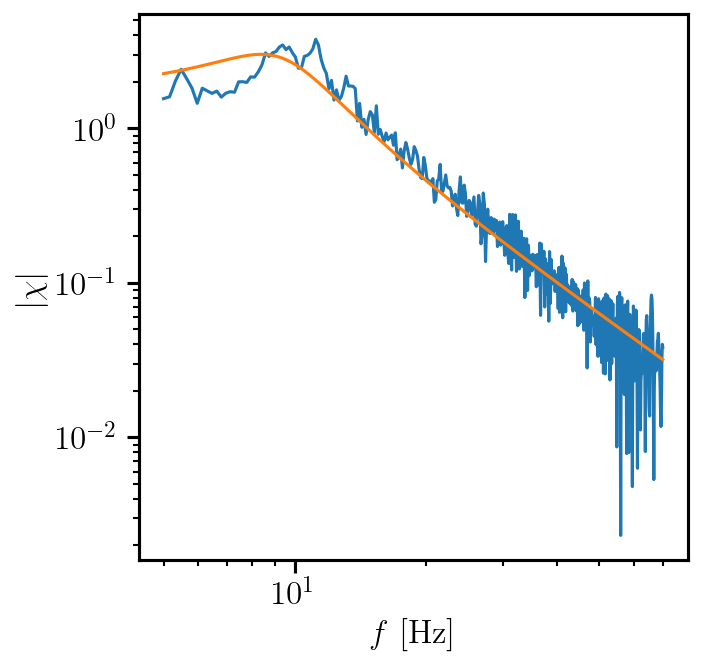

../data/250321-exp7/250321-exp7_step17.txt
[I, omega, alpha] =  [1.64235781e-04 5.85044748e+01 1.09360607e-02]


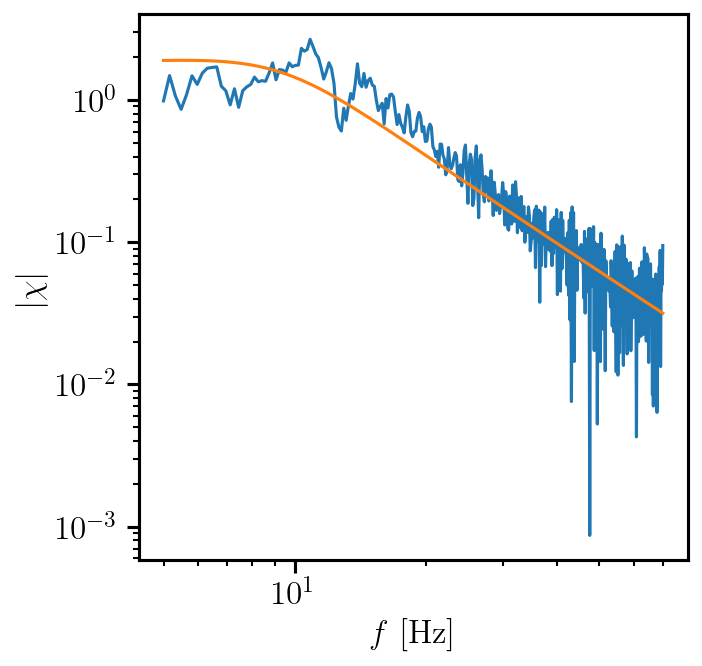

../data/250321-exp7/250321-exp7_step18.txt
[I, omega, alpha] =  [1.62855561e-04 5.85044748e+01 2.32990413e-02]


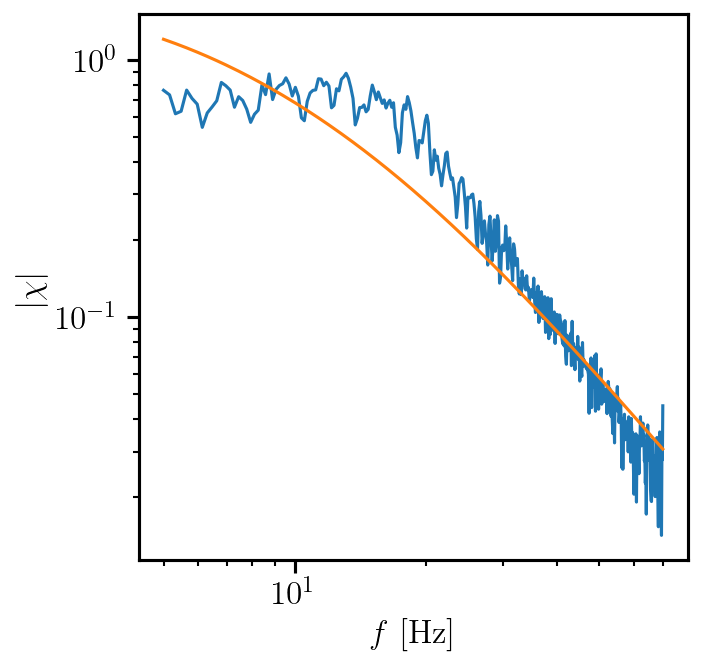

In [ ]:
# show_plots = True

all_popt_err_pass1 = unp.uarray(np.zeros((len(data), 3)), 0)
for i, step in enumerate(data):
    popt, pcov = sc.optimize.curve_fit(
        modulus_chi, step.freqs, step.chi_abs,
        bounds=(0, np.inf),
        p0=(1.52909606e-04, 5.13470885e+01, 3.07001079e-03)  # USE THIS TO FIT SAND
    )
    all_popt_err_pass1[i] = unp.uarray(popt, np.sqrt(np.diag(pcov)))

    # if show_plots:
    #     print(step.filename)
    #     if step.imposed_vibration < 1e-4:
    #         print("WARNING: THIS IS NOISE")
    #     print("[I, omega, alpha] = ", popt)
    #     plt.plot(step.freqs, step.chi_abs)
    #     plt.loglog(step.freqs, modulus_chi(step.freqs, *popt))
    #     plt.xlabel("$f$ [Hz]")
    #     plt.ylabel("$| \\chi |$")
    #     plt.show()

I, w0, _ = np.mean(all_popt_err_pass1, axis=0)
dI, dw0, _ = std_devs(np.mean(all_popt_err_pass1, axis=0))
all_popt_err_pass2 = np.zeros_like(all_popt_err_pass1)

for i, step in enumerate(data):
    popt, pcov = sc.optimize.curve_fit(
        modulus_chi, step.freqs, step.chi_abs,
        bounds=(
            (max(I.n - dI, 0), max(w0.n - dw0, 0), 0),
            (I.n + dI, w0.n + dw0, np.inf)
        ),
        # bounds=(0, np.inf),
        # p0 = (nom_vals(all_popt_err_pass1[i,0]), nom_vals(all_popt_err_pass2[i,1]), nom_vals(all_popt_err_pass1[i,2])),
        maxfev=5000
    )
    all_popt_err_pass2[i] = unp.uarray(popt, np.sqrt(np.diag(pcov)))

    if show_plots:
        print(step.filename)
        if step.imposed_vibration < 1e-4:
            print("WARNING: THIS IS NOISE")
        print("[I, omega, alpha] = ", popt)
        plt.plot(step.freqs, step.chi_abs)
        plt.loglog(step.freqs, modulus_chi(step.freqs, *popt))
        plt.xlabel("$f$ [Hz]")
        plt.ylabel("$| \\chi |$")
        plt.show()

In [6]:
I, omega0, alpha = np.mean(all_popt_err_pass1, axis=0)
print(f"{I = :.5f} g m²")
print(f"{omega0 = :.5f} Hz")
print(f"{alpha = :.5f} g m² s⁻¹")
I, omega0, alpha = np.mean(all_popt_err_pass2, axis=0)
print(f"{I = :.5f} g m²")
print(f"{omega0 = :.5f} Hz")
print(f"{alpha = :.5f} g m² s⁻¹")

I = 0.00016+/-0.00000 g m²
omega0 = 58.43176+/-0.07272 Hz
alpha = 0.00451+/-0.00002 g m² s⁻¹
I = 0.00016+/-0.00000 g m²
omega0 = 58.39944+/-0.28342 Hz
alpha = 0.00528+/-0.00005 g m² s⁻¹


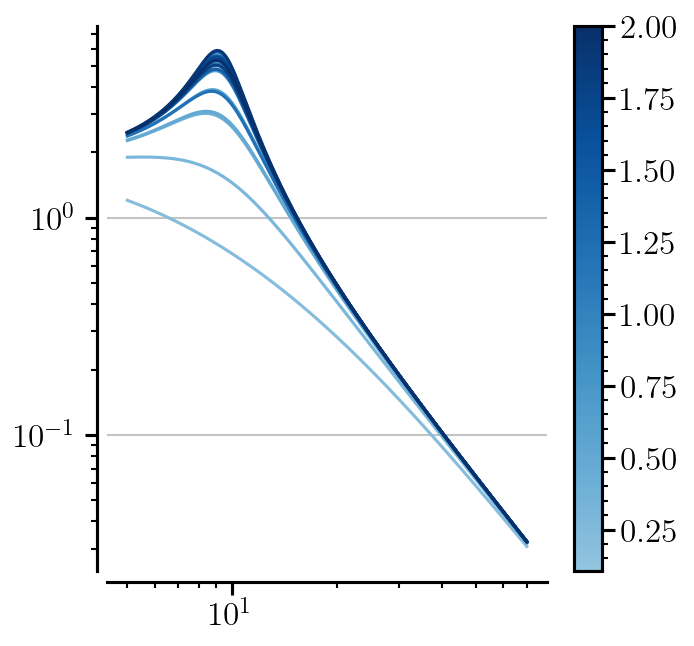

In [7]:
max_amplitude = max(step.imposed_vibration for step in data)
min_amplitude = min(step.imposed_vibration for step in data)

cmap = truncate_colormap(plt.cm.Blues, 0.4, 1.0)
norm = mpl.colors.Normalize(vmin=min_amplitude, vmax=max_amplitude)

fig, ax = plt.subplots()

for i, (popt, step) in enumerate(zip(reversed(nom_vals(all_popt_err_pass2)), reversed(data))):
    color = cmap(step.imposed_vibration / max_amplitude)
    fitted = modulus_chi(step.freqs, *popt)
    # ax.loglog(step.freqs, step.chi_abs, c=color)
    ax.loglog(step.freqs, fitted, c=color)

# plt.colorbar()
fig.colorbar(plt.cm.ScalarMappable(norm, cmap), ax=ax)

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_position(('outward', 5))
ax.grid(True, axis='y')
# ax.set_xlim(1e1, 4e1)
# ax.set_ylim(5e-2, 1e1)

## Fitted $\alpha$

-0.46+/-0.05


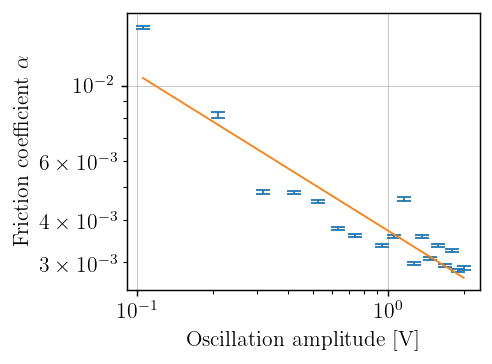

In [8]:
slope, offset = do_fit_alpha(data, all_popt_err_pass1[:, 2], "../data/glass_alpha_modulus")

# plt.text(0.4, 8e-3, fr"$\alpha \sim {slope:.1upL} \Gamma^{{-1}}$")
print(slope)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'Oscillation amplitude [V]')
plt.ylabel(r'Friction coefficient $\alpha$')

plt.tight_layout()
plt.savefig('../figures/glass_alpha_from_chi_modulus.png')
plt.show()